In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import import_ipynb
import preprocess

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp = train_test_split(x,y,train_size=0.75)
x_val,x_test,y_val,y_test = train_test_split(x,y,train_size=0.6)

In [ ]:
x_train = np.array([np.array(val) for val in x_train])
x_test = np.array([np.array(val) for val in x_test])
x_val = np.array([np.array(val) for val in x_val])

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size = (3,3),
                                padding = "same",
                                strides = (1,1),
                                input_shape = (100,75,1)))
model.add(tf.keras.layers.Conv2D(32,
                                kernel_size = (3,3),
                                padding = "same",
                                strides = (1,1),
                                input_shape = (100,75,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,
                                kernel_size = (3,3),
                                padding = "same",
                                strides = (1,1),
                                input_shape = (100,75,1)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128,activation = "relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [ ]:
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

In [ ]:
model.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [ ]:
results = model.fit(x_train , y_train,
                    batch_size=64,
                    epochs = 15,
                    validation_data=(x_val, y_val))

Epoch 1/15
103/103 [==============================] - 5s 42ms/step - loss: 2.2426 - accuracy: 0.2435 - val_loss: 2.2507 - val_accuracy: 0.2726
Epoch 2/15
103/103 [==============================] - 4s 38ms/step - loss: 1.6267 - accuracy: 0.4170 - val_loss: 1.9381 - val_accuracy: 0.4499
Epoch 3/15
103/103 [==============================] - 4s 37ms/step - loss: 1.3572 - accuracy: 0.5199 - val_loss: 1.5139 - val_accuracy: 0.6127
Epoch 4/15
103/103 [==============================] - 4s 38ms/step - loss: 1.2106 - accuracy: 0.5781 - val_loss: 1.0508 - val_accuracy: 0.7211
Epoch 5/15
103/103 [==============================] - 4s 39ms/step - loss: 1.0811 - accuracy: 0.6089 - val_loss: 1.6560 - val_accuracy: 0.3596
Epoch 6/15
103/103 [==============================] - 4s 38ms/step - loss: 0.9734 - accuracy: 0.6528 - val_loss: 0.6878 - val_accuracy: 0.8166
Epoch 7/15
103/103 [==============================] - 4s 38ms/step - loss: 0.8518 - accuracy: 0.6963 - val_loss: 0.5568 - val_accuracy: 0.8397

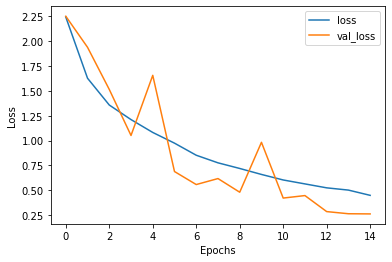

In [ ]:
plt.plot(results.history["loss"], label = "loss")
plt.plot(results.history["val_loss"], label = "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

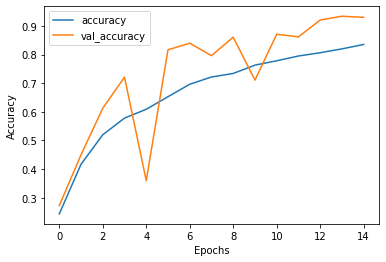

In [ ]:
plt.plot(results.history["accuracy"], label = "accuracy")
plt.plot(results.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

110/110 [==============================] - 1s 7ms/step - loss: 0.2330 - accuracy: 0.9405


[0.2329947054386139, 0.9404523372650146]